In [2]:
from matplotlib import pyplot as plt
from random import random,randint
import math
import numpy as np

def wineprice(rating,age):
    peak_age=rating-50
    # Calculate price based on rating
    price=rating/2
    if age>peak_age:
        # Past its peak, goes bad in 5 years
        price=price*(5-(age-peak_age))
    else:
        # Increases to 5x original value as it
        # approaches its peak
        price=price*(5*((age+1)/peak_age))
    if price<0: price=0
    return price


def wineset1(): 
    rows=[]
    for i in range(300):
        # Create a random age and rating 
        rating=random( )*50+50 
        age=random( )*50
        # Get reference price
        price=wineprice(rating,age)

        # Add some noise 
        price*=(random( )*0.4+0.8)

        # Add to the dataset
        rows.append({'input':(rating,age),
                          'result':price})
    return rows

def wineset3(): 
    rows=wineset1( ) 
    for row in rows:
        if random()<0.5:
        # Wine was bought at a discount store 
            row['result']*=0.6
    return rows

def gaussian(dist,sigma=10.0):
    return math.e**(-dist**2/(2*sigma**2))

def probguess(data,vec1,low,high,k=5,weightf=gaussian):
    dlist=getdistances(data,vec1)
    nweight=0.0
    tweight=0.0
    for i in range(k):
        dist=dlist[i][0]
        idx=dlist[i][1]
        weight=weightf(dist)
        v=data[idx]['result']
        # Is this point in the range?
        if v>=low and v<=high:
            nweight+=weight
        tweight+=weight
    if tweight==0: 
        return 0
    # The probability is the weights in the range
    # divided by all the weights
    return nweight/tweight

def euclidean(v1,v2):
    d=0.0
    for i in range(len(v1)):
        d+=(v1[i]-v2[i])**2
    return math.sqrt(d)

def getdistances(data,vec1):
    distancelist=[]
    for i in range(len(data)):
        vec2=data[i]['input']
        distancelist.append((euclidean(vec1,vec2),i)) 
    distancelist.sort( )
    return distancelist

def probabilitygraph(data,vec1,high,k=5,weightf=gaussian,ss=5.0):
    # Make a range for the prices
    t1=np.linspace(0.0,high,high/0.1)
    print(t1)
    # Get the probabilities for the entire range
    probs=[probguess(data,vec1,v,v+0.1,k,weightf) for v in t1]
    # Smooth them by adding the gaussian of the nearby probabilites
    smoothed=[]
    for i in range(len(probs)):
        sv=0.0
        for j in range(0,len(probs)):
            dist=abs(i-j)*0.1
            weight=gaussian(dist,sigma=ss)
            sv+=weight*probs[j]
        smoothed.append(sv)
    smoothed=list(smoothed)
    print(len(smoothed))
    plt.plot(t1,smoothed) 
    plt.show( )

In [3]:
data = wineset3()

/Users/shawlu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:84: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


[0.         0.10169492 0.20338983 0.30508475 0.40677966 0.50847458
 0.61016949 0.71186441 0.81355932 0.91525424 1.01694915 1.11864407
 1.22033898 1.3220339  1.42372881 1.52542373 1.62711864 1.72881356
 1.83050847 1.93220339 2.03389831 2.13559322 2.23728814 2.33898305
 2.44067797 2.54237288 2.6440678  2.74576271 2.84745763 2.94915254
 3.05084746 3.15254237 3.25423729 3.3559322  3.45762712 3.55932203
 3.66101695 3.76271186 3.86440678 3.96610169 4.06779661 4.16949153
 4.27118644 4.37288136 4.47457627 4.57627119 4.6779661  4.77966102
 4.88135593 4.98305085 5.08474576 5.18644068 5.28813559 5.38983051
 5.49152542 5.59322034 5.69491525 5.79661017 5.89830508 6.        ]
60


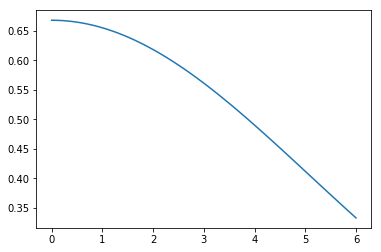

In [4]:
probabilitygraph(data,(1,1),6)